In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

- pass_time : 합격자 공부 시간
- fail_time : 불합격자 공부 시간

In [2]:
pass_time = [8, 9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5, 20, 20, 20]
fail_time = [1, 2, 2.1, 2.6, 2.7, 2.8, 2.9, 3, 3.2, 3.4, 3.5, 3.6, 3, 5, 5.2, 5.4]

- np.hstack()
	- horizontal stack(옆으로이어 붙인다)

In [3]:
X = np.hstack((pass_time, fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [4]:
y1 = [1]*len(pass_time)
y0 = [0]*len(fail_time)
y = np.hstack((y1, y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

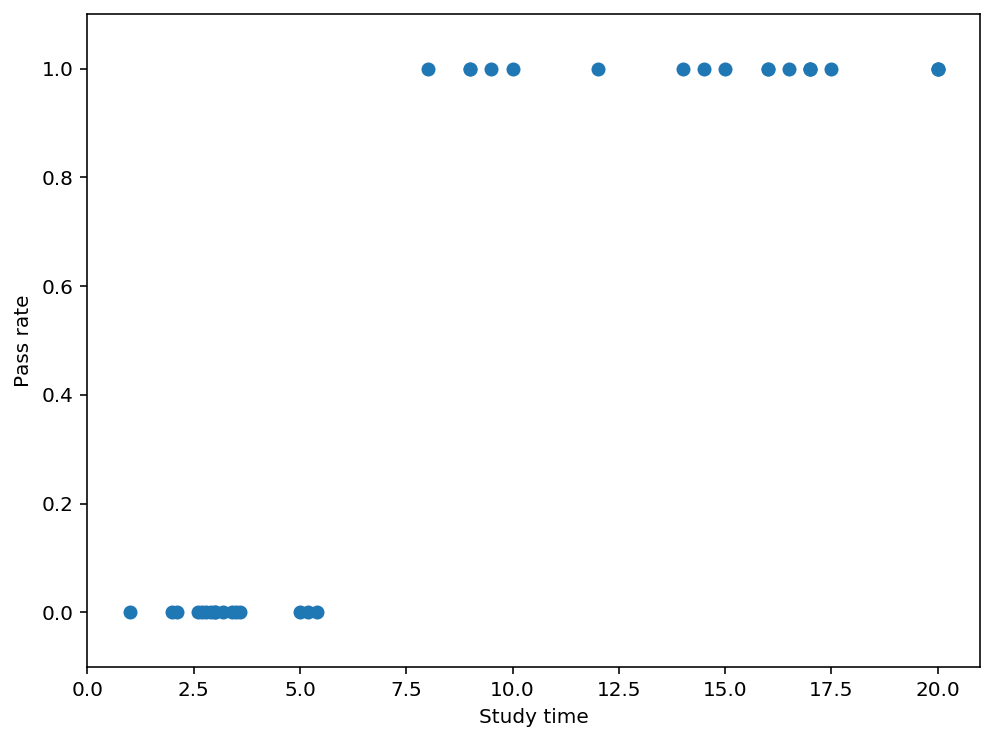

In [5]:
fig = plt.figure(figsize = (8, 6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X, y)
plt.show()

In [6]:
model = LogisticRegression()
model.fit(X.reshape(-1,1), y)

print(model.coef_)
print(model.intercept_)

[[0.40606369]]
[-2.47960598]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
sample = np.array([6.9])
# model.predict(sample.reshape[-1, 1])
model.predict(sample.reshape([-1, 1]))

array([1])

In [9]:
sample = np.array([13])
# model.predict(sample.reshape[-1, 1])
model.predict_proba(sample.reshape([-1, 1]))

array([[0.05736623, 0.94263377]])

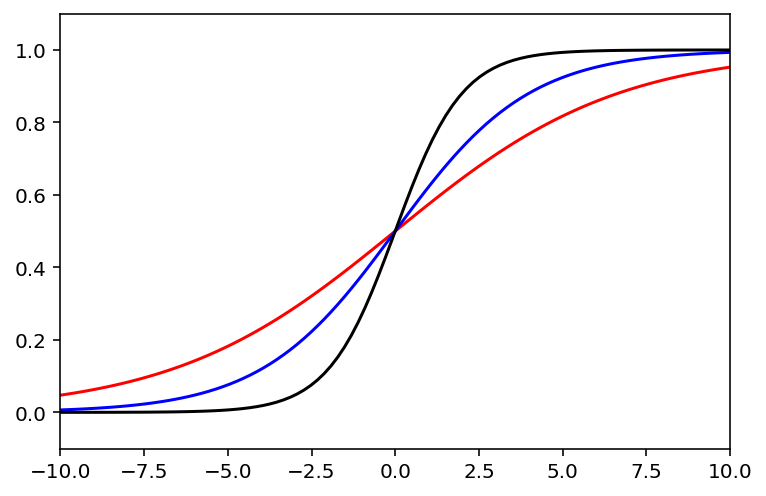

In [10]:
def logreg(z):
    return 1 /(1+np.exp(-z))

colors = ['r', 'b', 'k']
fig = plt.figure(figsize= (
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)

for i in range(3):
    for b in b_list:
        yy = logreg(a_list[i]*XX + b)
        plt.plot(XX, yy, c=colors[i])

# 성능 비교
## 유방암 예제

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold   # K-fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [14]:
data = pd.read_csv('data/breast_cancer.csv')
print(data.shape)

(569, 33)


In [15]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- 유방암 진단 데이터는 총 30개의 특성을 제공
- 이 중에 2개의 특성만 사용:radius_mean, texture_mean
- diagnosis : label로 사용

In [16]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

,diagnosis,radius_mean,texture_mean
0,1,17.99,10.38
1,1,20.57,17.77
2,1,19.69,21.25
3,1,11.42,20.38
4,1,20.29,14.34


# model로는 LogisticRegression() 사용

In [17]:
model = LogisticRegression()
y = df["diagnosis"]

## 먼저 radius_mean 특성만 사용
- 속성 radius_mean 하나만 사용하여 유방암 진단을 로지스틱 모델로 학습
- 테스트 데이터에 적용

In [18]:
features = ["radius_mean"]
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 85.96%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
X_test.shape

(171, 1)

In [20]:
print(model.coef_)

[[0.48325363]]


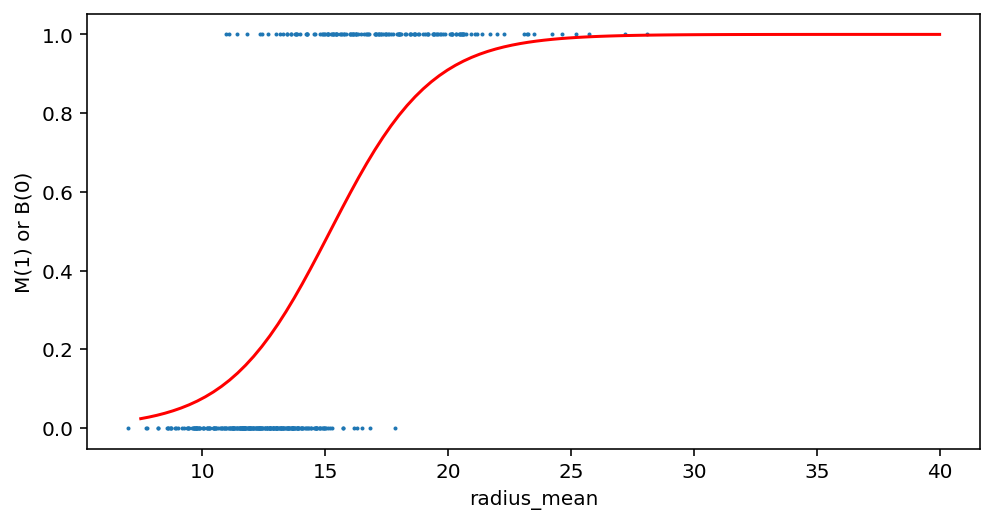

In [22]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

## 이번엔 texture_mean 특성만 사용
- 속성 texture_mean 하나만 사용하여 유방암 진단을 로지스틱 모델로 학습
- 테스트 데이터에 적용

In [23]:
features = ["texture_mean"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 66.08%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
print(model.coef_)
print(model.intercept_)

[[0.17814003]]
[-3.99279766]


## 이제 2개의 특성을 모두 사용
- 속성 radius_mean, texture_mean 2개를 모두 사용하여 유방암 진단을 로지스틱 모델로 학습
- 테스트 데이터에 사용

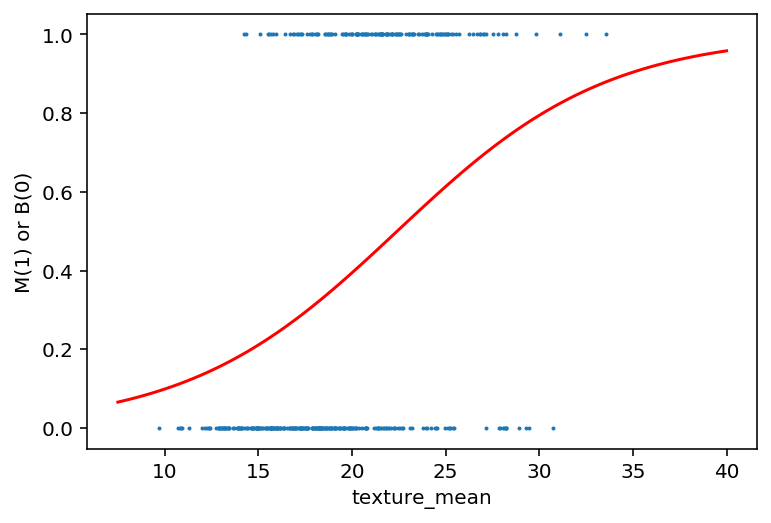

In [25]:
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX=np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_*XX+model.intercept_)[0], c='r')

In [28]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 90.06%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'texture_mean')

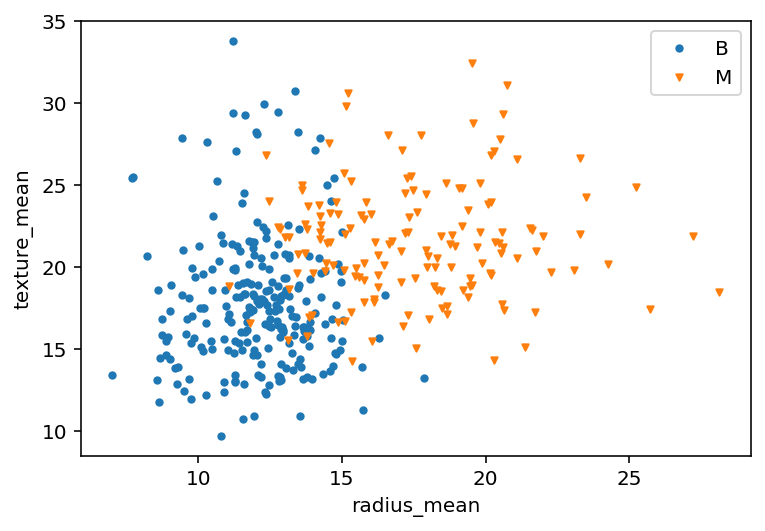

In [29]:
markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train==i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

In [30]:
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)
X=data.drop('diagnosis', axis=1)

In [31]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
print("Score: {0:.2%}".format(model_all.score(X_test, y_test)))

Score: 93.57%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 모든 속성을 다 사용한 경우의 kNN의 성능

In [33]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 90.06%
K =  3 -> Score: 91.81%
K =  5 -> Score: 93.57%
K =  7 -> Score: 92.98%
K =  9 -> Score: 92.98%
K =  11 -> Score: 92.40%
K =  13 -> Score: 92.40%
K =  15 -> Score: 91.81%
K =  17 -> Score: 91.81%
K =  19 -> Score: 91.81%


# 결정트리

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 92.98%


In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
print("랜덤포레스트 -> : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 -> : 96.49%


- 랜덤포레스트를 사용할 경우, 성능이 가장 좋은 것을 알 수 있다.

# 소프트맥스
- 다항 로지스틱스
    - 각 클래스로 분류될 가능성을 나타내는 점수를 구하고
    - 이 점수들을 사용하여 상대적인 확률을 구하는 softmax 함수를 사용
    - 입력값이 음수이어도 출력은 0~1 사이의 값을 가진다.

In [39]:
score = [1.5, 2.0, 1.8]

prob = []
sum = 0
for i in range(len(score)):
                  prob.append(np.exp(score[i]))
                  sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.25  0.412 0.338]


In [40]:
score = [-1, -0.5, 1.0, 1.5]

prob = []
sum = 0
for i in range(len(score)):
                  prob.append(np.exp(score[i]))
                  sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.045 0.074 0.333 0.548]
